In [1]:
import cv2
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def LoadImgs(path):
    images = []
    for filename in os.listdir(path):
        img = cv2.imread(os.path.join(path,filename),0)
        if img is not None:
            images.append(img)
    images = np.array(images)
    return images

In [3]:
ImgsF = LoadImgs('C://Users//sraba//OneDrive//Documents//ML_Barbu//Datasets//faces')
ImgsB = LoadImgs('C://Users//sraba//OneDrive//Documents//ML_Barbu//Datasets//background')

In [4]:
print(ImgsF.shape,ImgsB.shape)

(2429, 19, 19) (3699, 19, 19)


# Principal Component Analysis on the face images: The two largest eigenvalues are discarded in the graph of the remaining eigenvalues in descending order.

In [5]:
ImgsF_mean = ImgsF.reshape(2429,361) - np.mean(ImgsF.reshape(2429,361) , axis = 0)
ImgsF_cov = np.cov(ImgsF_mean , rowvar = False)
Eigen_Val , Eigen_Vec = np.linalg.eigh(ImgsF_cov)

sorted_idx = np.argsort(Eigen_Val)[::-1] 
sorted_EigVal = Eigen_Val[sorted_idx]
sorted_EigVec = Eigen_Vec[:,sorted_idx]

[Text(0.5, 0, 'Index of Eigen'), Text(0, 0.5, 'Eigen Values')]

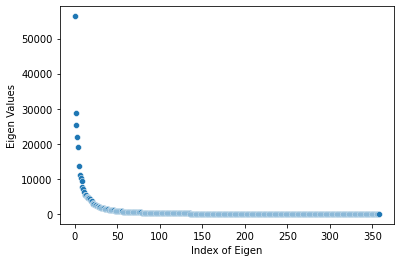

In [6]:
plot = sns.scatterplot(data=sorted_EigVal[2:362])
plot.set(xlabel='Index of Eigen', ylabel='Eigen Values')

# Graph of the coordinates of the faces projected to the 2D plane generated by the third and fourth principal component

In [7]:
PC_3_4 = sorted_EigVec[:,2:4]

In [8]:
ImgsF_projected = (PC_3_4.transpose()@ImgsF_mean.transpose()).transpose()

[Text(0.5, 0, 'Projections of Faces to the 3rd PC'),
 Text(0, 0.5, 'Projections of Faces to the 4th PC')]

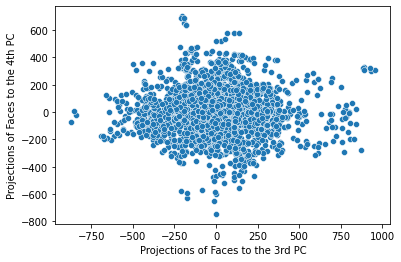

In [9]:
plot = sns.scatterplot(data = ImgsF_projected, x = ImgsF_projected[:,0], y = ImgsF_projected[:,1])
plot.set(xlabel='Projections of Faces to the 3rd PC', ylabel='Projections of Faces to the 4th PC')

# The coordinates of the projections of Faces and the projections of the Background patches on the same two principal components

In [10]:
ImgsB_mean = ImgsB.reshape(3699,361) - np.mean(ImgsB.reshape(3699,361) , axis = 0)
ImgsB_projected = (PC_3_4.transpose()@ImgsB_mean.transpose()).transpose()

[Text(0.5, 0, 'Projections to the 3rd PC'),
 Text(0, 0.5, 'Projections to the 4th PC')]

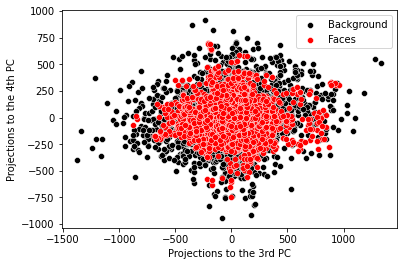

In [11]:
axis = plt.subplots()
 
axis = sns.scatterplot(data = ImgsB_projected, x = ImgsB_projected[:,0], y = ImgsB_projected[:,1], color = 'black')
axis = sns.scatterplot(data = ImgsF_projected, x = ImgsF_projected[:,0], y = ImgsF_projected[:,1], color = 'red')
axis.legend(labels = ["Background","Faces"])
axis.set(xlabel='Projections to the 3rd PC', ylabel='Projections to the 4th PC')

# The distances of the Faces (also the Background points) to the plane generated by the 20 largest principal components versus the coordinates of the projections on the first principal component for the faces (and background patches)

In [12]:
PC_20 = sorted_EigVec[:,0:20]

In [13]:
ImgsF_projected20 = (PC_20.transpose()@ImgsF_mean.transpose()).transpose()
ImgsB_projected20 = (PC_20.transpose()@ImgsB_mean.transpose()).transpose()

In [14]:
distF = np.linalg.norm((ImgsF_mean - ImgsF_projected20@PC_20.transpose()), axis=1)
distB = np.linalg.norm((ImgsB_mean - ImgsB_projected20@PC_20.transpose()), axis=1)

In [15]:
PC_1 = sorted_EigVec[:,0]
ImgsF_projected1 = (PC_1.transpose()@ImgsF_mean.transpose()).transpose()
ImgsB_projected1 = (PC_1.transpose()@ImgsB_mean.transpose()).transpose()

[Text(0.5, 0, 'Projections on the first PC'),
 Text(0, 0.5, 'Distances to the 20 Largest PC plane')]

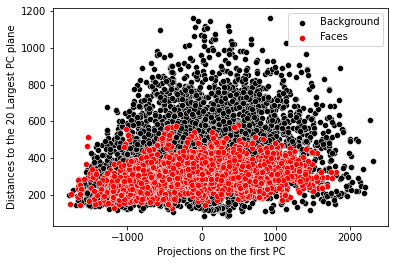

In [16]:
axis = plt.subplots()

axis = sns.scatterplot(x = ImgsB_projected1, y = distB, color = 'black')
axis = sns.scatterplot(x = ImgsF_projected1, y = distF, color = 'red')
axis.legend(labels = ["Background","Faces"])
axis.set(xlabel ='Projections on the first PC', ylabel ='Distances to the 20 Largest PC plane')

# Histogram of the distances obtained in the last section for the faces (and the background patches)

[Text(0.5, 0, 'Distances to the plane generated by the 20 largest PCs')]

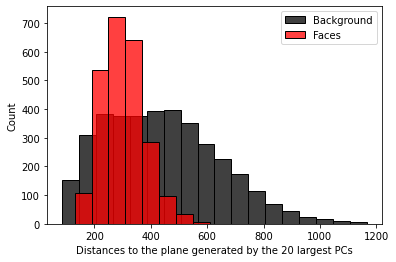

In [17]:
axis = plt.subplots()

axis = sns.histplot(data = distB, binwidth = 60, color = 'black', legend=True)
axis = sns.histplot(data = distF, binwidth = 60, color = 'red', legend=True)
axis.legend(labels = ["Background","Faces"])
axis.set(xlabel ='Distances to the plane generated by the 20 largest PCs')